# Objectives
- 노트북 가격 예측(회귀)

## Functions

In [1]:
import numpy as np
import pandas as pd
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import random
import os
import gc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import linear_kernel
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor
from lightgbm import LGBMClassifier
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import tensorflow as tf
from transformers import pipeline, set_seed, BertTokenizer, TFBertForSequenceClassification
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import re
import nltk 
from nltk.corpus import stopwords
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
from sentence_transformers import SentenceTransformer

## Load Data

In [2]:
file_path = 'D:\Code\Datasets/laptop_data_cleaned.csv'

df = pd.read_csv(file_path)

print(f'데이터프레임 원본 : \n{df}')

데이터프레임 원본 : 
     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD

## Data Pre-Processing

In [3]:
# 데이터의 전반적인 정보 확인 #
'''

컬럼 정보
Company : 회사
TypeName : 노트북 종류
--------------------- 노트북의 가격 예측과 관련이 없다고 말할 수 있는가..?

Ram : 메모리
Weight : 무게
Price : 가격
TouchScreen : 터치 스크린
IPS : IPS 화면
Ppi : 해상도의 밀도 단위
Cpu_brand : CPU 사양
HDD : hdd 용량
SSD : ssd 용량
Gpu_brand : 그래픽카드 브랜드
Os : 운영체제

'''

'\n\n컬럼 정보\nCompany : 회사\nTypeName : 노트북 종류\n--------------------- 노트북의 가격 예측과 관련이 없다고 말할 수 있는가..?\n\nRam : 메모리\nWeight : 무게\nPrice : 가격\nTouchScreen : 터치 스크린\nIPS : IPS 화면\nPpi : 해상도의 밀도 단위\nCpu_brand : CPU 사양\nHDD : hdd 용량\nSSD : ssd 용량\nGpu_brand : 그래픽카드 브랜드\nOs : 운영체제\n\n'

In [4]:
# 누락 데이터 확인

df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

### 데이터 분석 목적에 영향이 없는 컬럼 제거

In [5]:
df.drop(columns = ['Company'], inplace = True)

print(df)

                TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0              Ultrabook    8    1.37  11.175755            0    1   
1              Ultrabook    8    1.34  10.776777            0    0   
2               Notebook    8    1.86  10.329931            0    0   
3              Ultrabook   16    1.83  11.814476            0    1   
4              Ultrabook    8    1.37  11.473101            0    1   
...                  ...  ...     ...        ...          ...  ...   
1268            Notebook    4    2.20  10.555257            0    0   
1269  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271            Notebook    2    1.50   9.409283            0    0   
1272            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1     127.67794

In [6]:
df.drop(columns = ['TypeName'], inplace=True)

In [7]:
print(df)

      Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0       8    1.37  11.175755            0    1  226.983005   
1       8    1.34  10.776777            0    0  127.677940   
2       8    1.86  10.329931            0    0  141.211998   
3      16    1.83  11.814476            0    1  220.534624   
4       8    1.37  11.473101            0    1  226.983005   
...   ...     ...        ...          ...  ...         ...   
1268    4    2.20  10.555257            0    0  100.454670   
1269    4    1.80  10.433899            1    1  157.350512   
1270   16    1.30  11.288115            1    1  276.053530   
1271    2    1.50   9.409283            0    0  111.935204   
1272    6    2.19  10.614129            0    0  100.454670   

                  Cpu_brand   HDD  SSD Gpu_brand       Os  
0             Intel Core i5     0  128     Intel      Mac  
1             Intel Core i5     0    0     Intel      Mac  
2             Intel Core i5     0  256     Intel   Others  
3             I

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ram          1273 non-null   int64  
 1   Weight       1273 non-null   float64
 2   Price        1273 non-null   float64
 3   TouchScreen  1273 non-null   int64  
 4   Ips          1273 non-null   int64  
 5   Ppi          1273 non-null   float64
 6   Cpu_brand    1273 non-null   object 
 7   HDD          1273 non-null   int64  
 8   SSD          1273 non-null   int64  
 9   Gpu_brand    1273 non-null   object 
 10  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 109.5+ KB


c:\Users\human\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


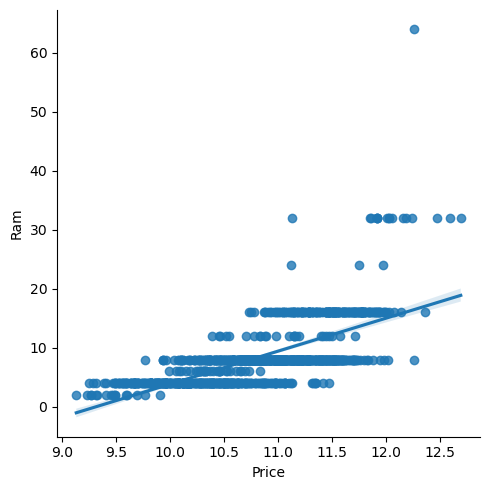

********************************************************************************


c:\Users\human\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


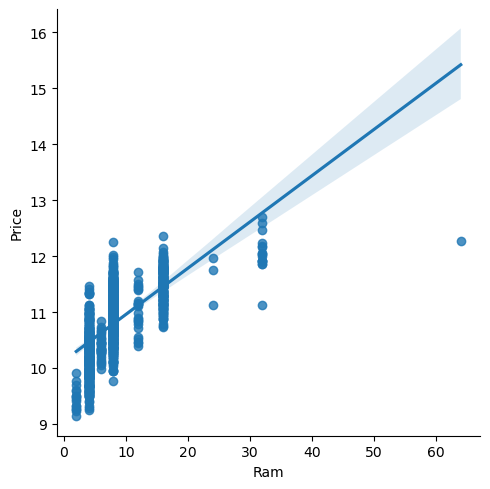

'\n\nIBM SPSS 프로그램이 아닌 다른 방식, 이와 같은\n\n방식으로 정확한 분석은 불가능\n\n하지만 밑의 예시로 볼 때 램의 가격과 노트북은 유의미한 \n\n상관관계가 있음 \n\n'

In [49]:
### RAM컬럼과 Price컬럼(노트북의 가격)의 관계 분석

import matplotlib.pyplot as plt
import seaborn as sns

#---------------------------------

sns.lmplot(data=df, x='Price', y='Ram')
plt.show()

print('*'*80)

sns.lmplot(data=df, x='Ram', y='Price')
plt.show()

'''

IBM SPSS 프로그램이 아닌 다른 방식, 이와 같은

방식으로 정확한 분석은 불가능

하지만 밑의 예시로 볼 때 램의 가격과 노트북은 유의미한 

상관관계가 있음 

'''

# x와 y축을 바꿨을 경우 위쪽 데이터가 거의 전무한데 큰 의미가 있는건지



c:\Users\human\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


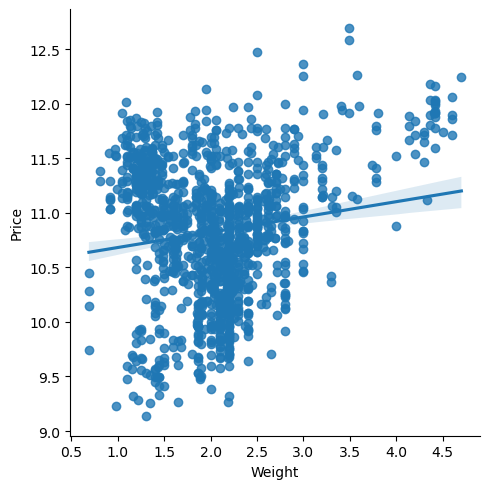

********************************************************************************


c:\Users\human\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


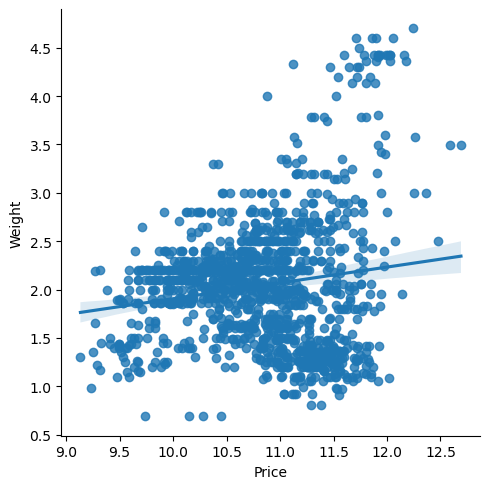

'\n잘모르겠다...\n\n'

In [48]:
### Weight컬럼과 Price컬럼(노트북의 관계)의 관계 분석

sns.lmplot(data=df, x='Weight', y='Price')
plt.show()

print('*'*80)

sns.lmplot(data=df, x='Price', y='Weight')
plt.show()

'''
잘모르겠다...

'''

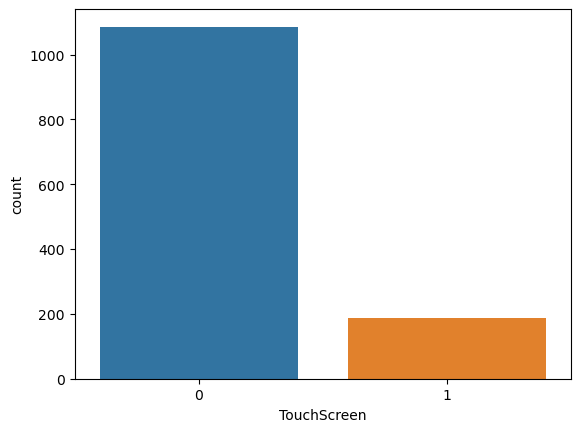

터치스크린 컬럼의 밸류 값 추출 : 
TouchScreen
0    1086
1     187
Name: count, dtype: int64
********************************************************************************
터치스크린 컬럼의 밸류 비율 추출 : 
TouchScreen
0    0.853103
1    0.146897
Name: proportion, dtype: float64
********************************************************************************


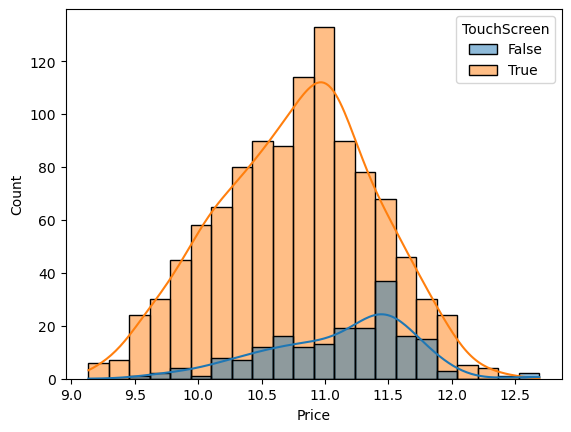

********************************************************************************
********************************************************************************
터치스크린이 있을 때의 밸류 값 : 
Price
11.470547    8
11.144911    4
10.882316    4
11.288115    4
11.219074    4
            ..
11.671319    1
9.676005     1
10.808593    1
10.646340    1
10.433899    1
Name: count, Length: 144, dtype: int64
터치스크린이 있을 때의 비율 : 
Price
10.977717    0.010129
10.188167    0.010129
11.064804    0.008287
11.288115    0.007366
10.776844    0.007366
               ...   
10.893267    0.000921
11.575963    0.000921
11.016448    0.000921
11.078373    0.000921
10.614129    0.000921
Name: proportion, Length: 716, dtype: float64
********************************************************************************
터치스크린이 없을 때의 밸류 값 : 
Price
10.977717    11
10.188167    11
11.064804     9
11.288115     8
10.776844     8
             ..
10.893267     1
11.575963     1
11.016448     1
11.078373     1
10.614129     1
Name: coun

In [32]:
### TouchScreen컬럼과 Price컬럼(노트북의 가격)과의 관계 분석

# TouchScreen이 존재할 때와 존재하지 않을때의 상관 관계 분석

sns.countplot(data=df, x='TouchScreen')
plt.show()

counts = df.loc[:,'TouchScreen'].value_counts()
print(f'터치스크린 컬럼의 밸류 값 추출 : \n{counts}')

print('*'*80)

ratio = df.loc[:,'TouchScreen'].value_counts(normalize=True)
print(f'터치스크린 컬럼의 밸류 비율 추출 : \n{ratio}')

print('*'*80)

## 두 컬럼의 관계 분석 및 시각화

sns.histplot(data=df, x='Price', hue=condition1,kde=True)
plt.show()

print('*'*80)
print('*'*80)

condition2 = df.loc[:,'TouchScreen']==1

counts2 = df.loc[condition2, 'Price'].value_counts()

print(f'터치스크린이 있을 때의 밸류 값 : \n{counts2}')

ratio2 = df.loc[condition2, 'Price'].value_counts(normalize=True)

print(f'터치스크린이 있을 때의 비율 : \n{ratio1}')

print('*'*80)

condition1 = df.loc[:,'TouchScreen']==0

counts1 = df.loc[condition1,'Price'].value_counts()

print(f'터치스크린이 없을 때의 밸류 값 : \n{counts1}')

ratio1 = df.loc[condition1, 'Price'].value_counts(normalize=True)

print(f'터치스크린이 없을 때의 비율 : \n{ratio1}')

print('*'*80)



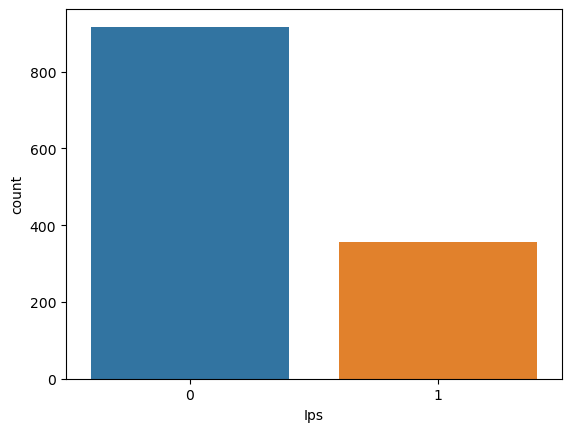

 Ips컬럼의 밸류 값 : 
Ips
0    917
1    356
Name: count, dtype: int64
********************************************************************************
 Ips컬럼의 비율 : 
Ips
0    0.720346
1    0.279654
Name: proportion, dtype: float64
********************************************************************************
********************************************************************************


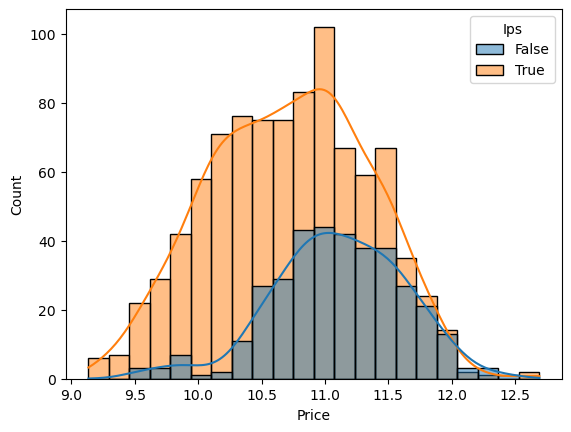

 두번째 밸류 값 : 
Price
10.188167    11
11.470547    10
10.977717     9
11.064804     8
10.830970     7
             ..
11.834588     1
10.910679     1
11.572957     1
10.066418     1
10.614129     1
Name: count, Length: 621, dtype: int64
 두번째 비율 값 : 
Price
11.470547    0.042781
11.144911    0.021390
10.882316    0.021390
11.288115    0.021390
11.219074    0.021390
               ...   
11.671319    0.005348
9.676005     0.005348
10.808593    0.005348
10.646340    0.005348
10.433899    0.005348
Name: proportion, Length: 144, dtype: float64


In [41]:
### Ips컬럼과 Price컬럼의 관계 분석

sns.countplot(data=df, x='Ips')
plt.show()

counts1 = df.loc[:,'Ips'].value_counts()

print(f' Ips컬럼의 밸류 값 : \n{counts1}')

print('*'*80)

ratio1 = df.loc[:,'Ips'].value_counts(normalize=True)

print(f' Ips컬럼의 비율 : \n{ratio1}')

print('*'*80)
print('*'*80)

sns.histplot(data=df, x='Price', hue=condition1, kde=True)
plt.show()


condition1 = df.loc[:,'Ips']==0

counts2 = df.loc[condition1, 'Price'].value_counts()

print(f' 두번째 밸류 값 : \n{counts2}')

ratio2 = df.loc[condition2, 'Price'].value_counts(normalize=True)

print(f' 두번째 비율 값 : \n{ratio2}')



c:\Users\human\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


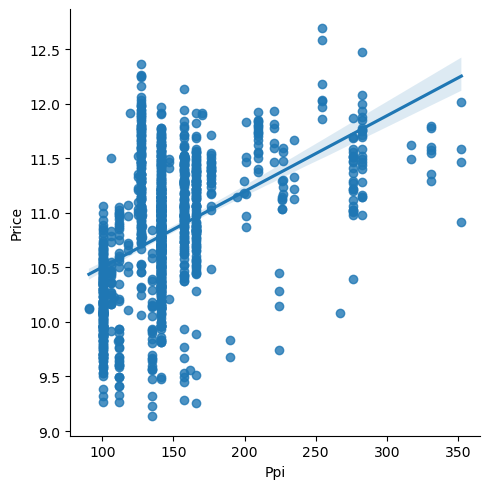

********************************************************************************


c:\Users\human\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


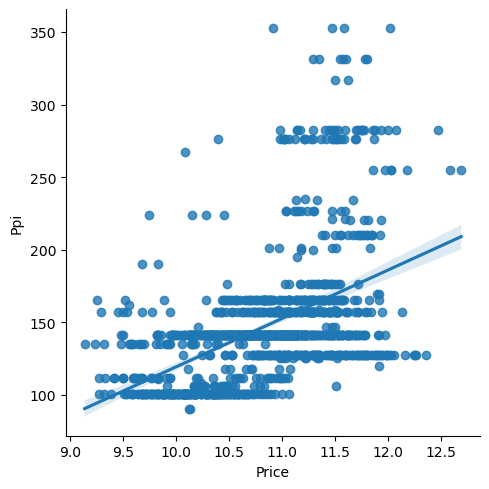

In [47]:
### ppi컬럼과 Price컬럼(노트북의 가격)과의 관계 분석

sns.lmplot(data=df, x='Ppi', y='Price')
plt.show()

print('*'*80)

sns.lmplot(data=df, x='Price', y='Ppi')
plt.show()